In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from folium import Map
from folium import Marker
import re

# The Shape data of Districts in Boston
shape = pd.read_csv('../../data/shapefile.csv')

# The Shootings dashboard contains information on shooting incidents where a victim was struck by a bullet, either fatally or non-fatally
# date: 2015-2023
shootings=pd.read_csv('../../data/shootings.csv')

#
violence=pd.read_csv('../../data/violence.csv')

# crime incident reports
# crime_incident=pd.read_csv('../../data/crime_incident_reports_2022.csv', low_memory=False)
# Set the column name correctly
def replace_header(df):
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    return df

def process(my_str):
    if isinstance(my_str,str):
        return int(re.sub(r'[^0-9.]', '', my_str))
    else:
        return my_str

# # crime incident reports
# crime_incident=pd.read_csv('../../data/crime_incident_reports_2022.csv', low_memory=False)

#The Student Discipline Data Report reports the disciplines that public school students in Massachusetts 
# received for the offenses committed, as reported by school districts in the School Safety Discipline Report (SSDR).
disciplines = pd.read_excel('../../data/StudentDisciplineDataReport.xlsx')
disciplines = replace_header(disciplines)
# print(disciplines)
# delete other types of crimes
for i in range(1,9):
    disciplines_todelete = pd.read_excel('../../data/StudentDisciplineDataReport ({}).xlsx'.format(str(i)))
    disciplines_todelete = replace_header(disciplines_todelete)
    distict_todelete = disciplines_todelete["District Name"].tolist()
    student_todelete = disciplines_todelete["Students Disciplined"].tolist()
    for _, row in disciplines.iterrows():
        if row["District Name"] in distict_todelete:
            row["Students Disciplined"] = process(row["Students Disciplined"]) - process(student_todelete[distict_todelete.index(row["District Name"])])
    
    
# 2021-22 (End of year) Attendance Report (District) - All Students 
attendance = pd.read_excel('../../data/attendance.xlsx')
attendance = replace_header(attendance)

# 2021-22 Enrollment by Grade Report (District) 
enrollment = pd.read_excel('../../data/enrollmentbygrade.xlsx')
enrollment = replace_header(enrollment)

# Individual, de-identified records of firearms transactions by firearms dealers. 
# Includes dates; shop name and location; and make, model, and other information about the firearm sold.
transactions = pd.read_csv('../../data/Firearms Dealer transactions.csv')
licenses = pd.read_excel('../../data/Firearms Licenses Active on 01.01.23.xlsx')

# 2023 Police station location
police = pd.read_csv('../../data/boston-massachusetts-police-districts.csv')


    Shape Part

/var/folders/ct/ytm4tvld3jjc50738s4mm_6w0000gn/T/ipykernel_87035/2618750485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shape.loc[:,col] = shape[col]/shape[col].sum()


<AxesSubplot: title={'center': 'Shape Plot in D4'}, xlabel='SHORTNAME'>

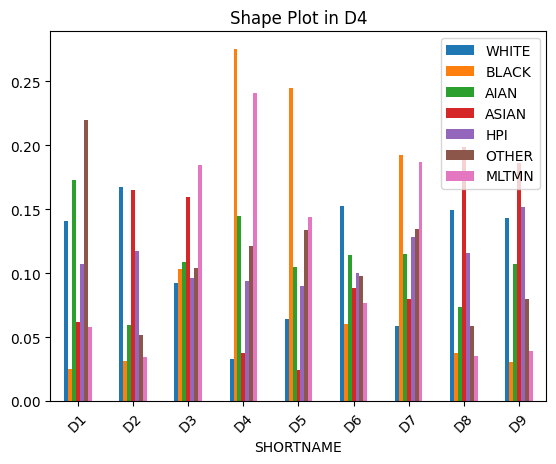

In [ ]:
df_shape = shape[['SHORTNAME','TOTAL','TOTAL18','TOTALNH','WHITE', 'BLACK',
       'AIAN', 'ASIAN', 'HPI', 'OTHER', 'MLTMN']]
for col in df_shape.columns[1:]:
    df_shape.loc[:,col] = shape[col]/shape[col].sum()
#temp.plot.bar(x = 'SHORTNAME', y = [lambda x: x/x.sum()])
df_shape.plot.bar(x='SHORTNAME',y = df_shape.columns[4:], rot = 45, title='Shape Plot in D4')

#TODO: solve warning

We can see that the proportion of BLACK and MLTMN is relatively high, while the proportion of WHITE and ASIAN is relatively low in D4.

    Shootings Part
Based on the police map and district map in the "reference" folder, District 4 includes the B3, half of B2 and half of C11 in police district.

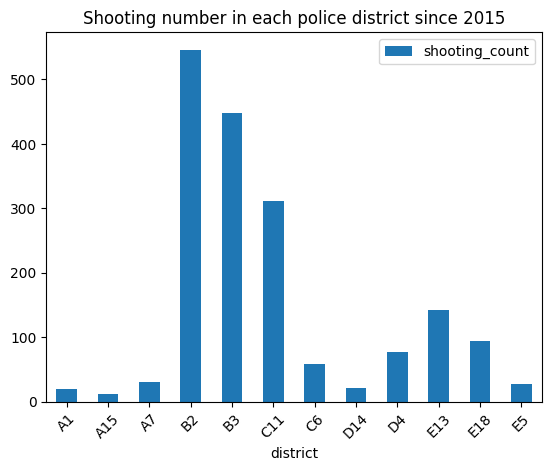

In [ ]:
district_shooting_count = shootings.groupby('district').agg({'district': 'count'}).rename(columns={'district': 'shooting_count'}).reset_index()
district_shooting_count.plot.bar(x='district', y='shooting_count',rot = 45)
plt.title('Shooting number in each police district since 2015')
plt.show()

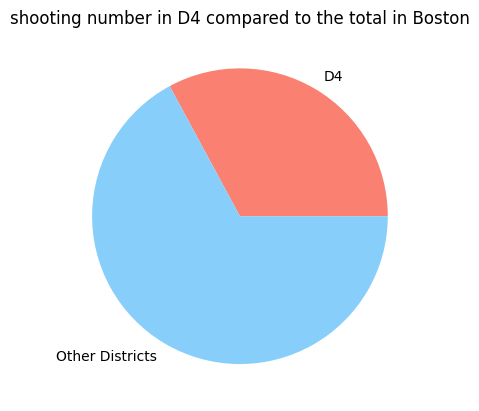

In [ ]:
D4_shooting_count = 448 + 0.5 * 546 + 0.5 * 312
shooting_count = district_shooting_count['shooting_count'].sum()
plt.pie([D4_shooting_count,shooting_count], labels=['D4', 'Other Districts'], colors=['salmon', 'lightskyblue'])
plt.title('shooting number in D4 compared to the total in Boston')
plt.show()

#TODO: the ratio between the shooting count and the popultion in each district; the bar chart of shooting count in each district

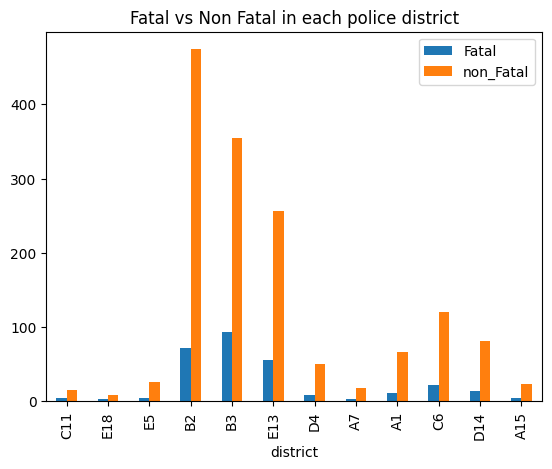

In [ ]:
df_fnf = pd.DataFrame()
df_fnf['district'] = shootings['district'].unique()
df_fnf['Fatal']= shootings[shootings['shooting_type_v2'] == 'Fatal'].groupby(['district']).agg({'district': 'count'}).rename(columns={'district': 'x'}).reset_index()['x']
df_fnf['non_Fatal']= shootings[shootings['shooting_type_v2'] == 'Non-Fatal'].groupby(['district']).agg({'district': 'count'}).rename(columns={'district': 'x'}).reset_index()['x']
df_fnf.plot.bar(x='district')
plt.title('Fatal vs Non Fatal in each police district')
plt.show()

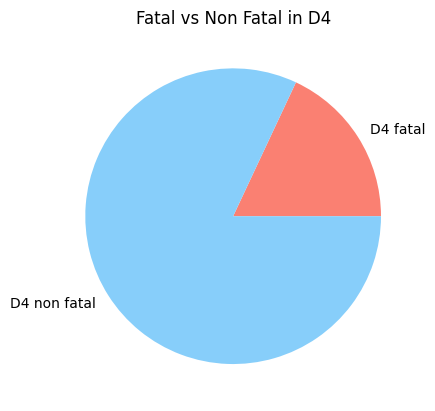

In [ ]:
D4_fatal = 94 + 0.5*72 + 0.5*56
D4_nonFatal = 354 + 0.5*474 + 0.5*256
plt.pie([D4_fatal,D4_nonFatal], labels=['D4 fatal', 'D4 non fatal'], colors=['salmon', 'lightskyblue'])
plt.title('Fatal vs Non Fatal in D4')
plt.show()

#TODO: The bar chart in each district instead of polices districts

D4 analysis
Since the main police district in D4 is B3, we choose it for the following part, we can possibly improve our estimation by considering the rest part of police district in D4.

Non-Fatal    354
Fatal         94
Name: shooting_type_v2, dtype: int64


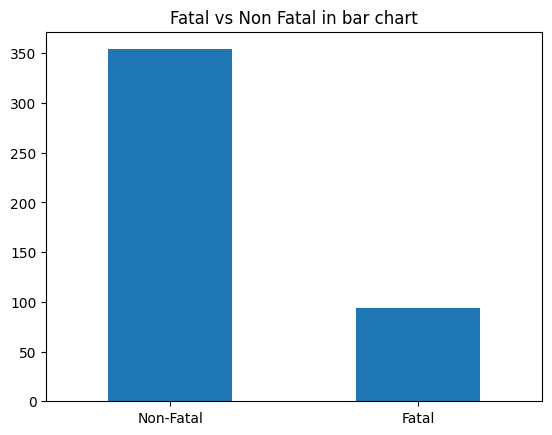

In [ ]:
d4shooting=shootings.loc[shootings['district']=='B3',:]

type_stats=d4shooting['shooting_type_v2'].value_counts()
print(type_stats)
type_stats.plot(kind='bar',rot=0)
plt.title("Fatal vs Non Fatal in bar chart")
plt.show()

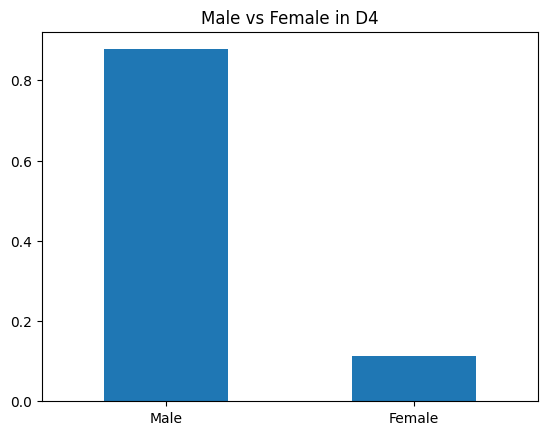

In [ ]:
gender=(d4shooting['victim_gender'].value_counts()/d4shooting.shape[0]).plot(kind='bar',rot=0, title='Male vs Female in D4')


Above two images indicate that around 88% of the shooting events are non-Fatal and the ratio of male victim is much higher than the ratio of female victim.

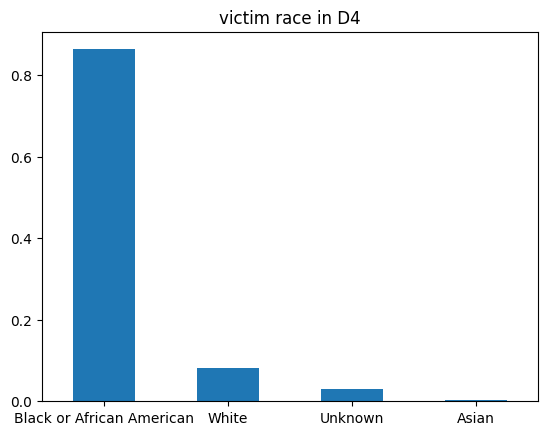

In [ ]:
gender=(d4shooting['victim_race'].value_counts()/d4shooting.shape[0]).plot(kind='bar',rot=0, title='victim race in D4')


Based on the chart, the ratio of black or african american victim is much higher than the ratio of other victim.

    Violence/Crime Part
Similarly to the previous part, we use the police distrcit B3 so far, and we can possibly improve it by constructing a more close estimation.  

The observation shows that out of the total number of violence incidents, only 6 involved the use of guns, while 1339 incidents did not involve any gunshots.

In [4]:
map_data=violence.groupby('Location',as_index=False).size()
location=map_data.Location.str.replace("(","").str.replace(")","").str.split(",",expand=True)
map_data[['latitude','longitude']]=location
#print(map_data)
map_data.drop('Location',axis=1,inplace=True)
size = map_data.pop('size')
map_data.insert(2,'size',size)

#print(map_data)
base_map = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data).add_to(base_map)
base_map

/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_3608/1709139204.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  location=map_data.Location.str.replace("(","").str.replace(")","").str.split(",",expand=True)


From the heatmap, I observed that the east part of the district 4 has more violence.

<AxesSubplot: >

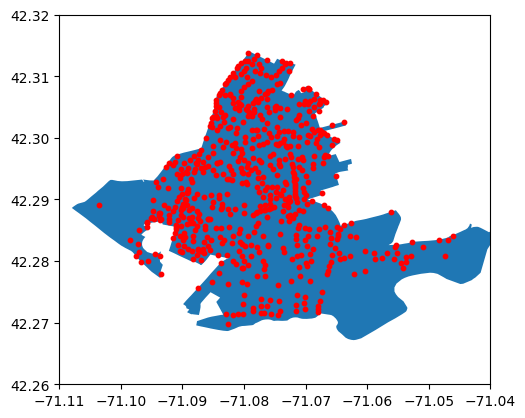

In [5]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
distrcit_shape = gpd.read_file("../../data/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson")
# get the district 4 map
d4 = distrcit_shape[distrcit_shape['DISTRICT']==4]
# Convert the dataframe to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(map_data.longitude, map_data.latitude)
locations_gdf = gpd.GeoDataFrame(map_data, geometry=geometry)
# print(locations_gdf)

geometry = gpd.points_from_xy(map_data.longitude, map_data.latitude)
locations_gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

# Plot the map with the locations
ax = d4.plot()
ax.set_xlim(-71.11, -71.04)
ax.set_ylim(42.26, 42.32)
x = locations_gdf.loc[locations_gdf['geometry'].within(d4['geometry'].values[0])]
x.plot(ax=ax, marker='o', color='red', markersize=10)

#TODO: filter the scatter plot so that we only have data in D4

The above figure shows that the violence happened the most in the middle part of the D4. We have to filter out the
violence of D4 in the future work.

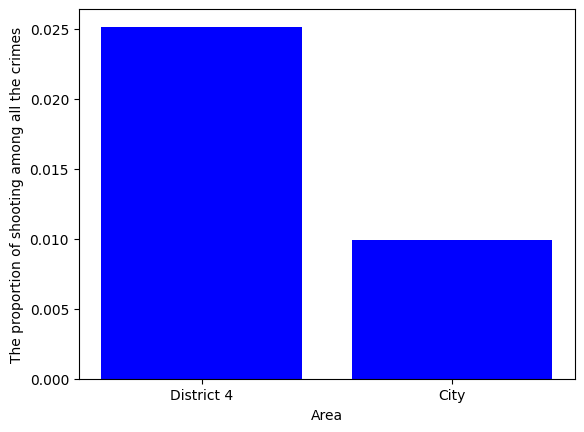

In [ ]:
# calculate shooting crime proportion in each area
X = ["District 4","City"]
Y = [crime_incident[(crime_incident['DISTRICT']=='B3') & (crime_incident["SHOOTING"] == 1)].shape[0]/crime_incident[crime_incident['DISTRICT']=='B3'].shape[0],
    crime_incident[crime_incident["SHOOTING"]==1].shape[0]/crime_incident.shape[0]]

plt.bar(X,Y,color='b')
plt.xlabel('Area')
plt.ylabel('The proportion of shooting among all the crimes')
plt.show()
# crime_incident[(crime_incident['DISTRICT']=='D4')]["SHOOTING"].value_counts()

We can tell that District 4 has relatively large proportion of shooting crimes compared to the whole city.

In [ ]:
crime_incident[crime_incident['DISTRICT']=='B3']["SHOOTING"].value_counts()

0    7132
1     184
Name: SHOOTING, dtype: int64

Similarly, shooting has only 2.5% share of all the crimes in D4.

In [ ]:
# heat map for thee whole city crime

map_data=crime_incident.groupby(['Lat', 'Long'], as_index=False).size()

base_map_whole_city = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data).add_to(base_map_whole_city)

#set markers for shooting ones.
crime_incident_shooting = crime_incident[crime_incident["SHOOTING"]==1]

for index, row in crime_incident_shooting.iterrows():
    tooltip = f"{row['OFFENSE_CODE']} ({row['INCIDENT_NUMBER']} incident)"
    if not np.isnan(row['Lat']) and not np.isnan(row['Long']):
        Marker(location=[row['Lat'], row['Long']], tooltip=tooltip).add_to(base_map_whole_city)

base_map_whole_city.save('../../data/crime_map_whole_city.html')
base_map_whole_city

We can see the shooting violence focus mainly on D4.

In [ ]:
crime_d4 = crime_incident[crime_incident["DISTRICT"]=="B3"]

map_data_d4 = crime_d4.groupby(['Lat', 'Long'], as_index=False).size()

base_map_d4 = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data_d4).add_to(base_map_d4)

#set markers for shooting ones.
crime_incident_shooting_d4 = crime_d4[crime_d4["SHOOTING"]==1]

for index, row in crime_incident_shooting_d4.iterrows():
    tooltip = f"{row['OFFENSE_CODE']} ({row['INCIDENT_NUMBER']} incident)"
    if not np.isnan(row['Lat']) and not np.isnan(row['Long']):
        Marker(location=[row['Lat'], row['Long']], tooltip=tooltip).add_to(base_map_d4)

base_map_d4.save('../../data/crime_map_d4.html')
base_map_d4

In terms of D4, shooting crime mainly happened in the northern part, which get closer to the city area

    School Discipline Part

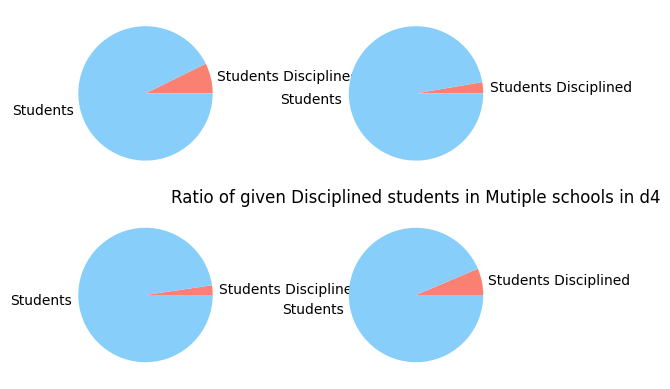

In [2]:
D4_school = ['04380000', '35050000', '04630000', '04280000']
D4_disc = disciplines[disciplines['District Code'].isin(D4_school)]

students = D4_disc["Students"].tolist()
students_disciplined = D4_disc["Students Disciplined"].tolist()

fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        ax[i, j].pie([process(students_disciplined[i*2+j]),process(students[i*2+j])], labels=['Students Disciplined', 'Students'], colors=['salmon', 'lightskyblue'])

plt.title('Ratio of given Disciplined students in Mutiple schools in d4')
plt.show()

/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_6819/2748909936.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_attendance = df_attendance.append({"District Name":"All area mean rate", "Attendance Rate": attendance["Attendance Rate"].mean()},ignore_index=True)
/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_6819/2748909936.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_attendance = df_attendance.append({"District Name":"All area median rate", "Attendance Rate": attendance["Attendance Rate"].median()},ignore_index=True)


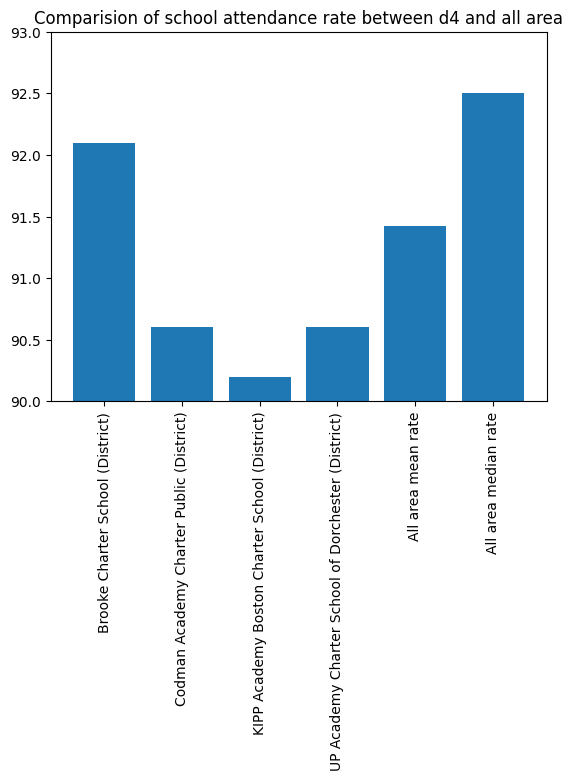

In [3]:
attendance["Attendance Rate"] = attendance["Attendance Rate"].astype('float64')
D4_attendance = attendance[attendance["District Code"].isin(D4_school)]
df_attendance = pd.DataFrame()
df_attendance["District Name"] = D4_attendance["District Name"]
df_attendance["Attendance Rate"] = D4_attendance["Attendance Rate"]
df_attendance = df_attendance.append({"District Name":"All area mean rate", "Attendance Rate": attendance["Attendance Rate"].mean()},ignore_index=True)
df_attendance = df_attendance.append({"District Name":"All area median rate", "Attendance Rate": attendance["Attendance Rate"].median()},ignore_index=True)
plt.bar(df_attendance["District Name"],df_attendance["Attendance Rate"])
plt.title('Comparision of school attendance rate between d4 and all area')
plt.ylim(90,93)
plt.xticks(rotation=90)
plt.show()

We noticed than 3 of 4 schools in d4 has a lower attendance than the median and average school attendance in this area, which may lead to a higher crime rate.

/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_6819/1740635006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_enrollment = df_enrollment.append({"District Name":"All area mean rate", "Total": enrollment.loc[enrollment['District Name']=="State Totals"]["Total"]/len(enrollment)-1},ignore_index=True)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

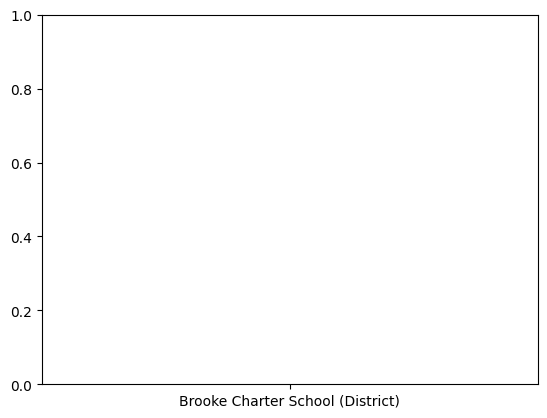

In [4]:
enrollment["Total"] = enrollment["Total"].apply(process)
D4_enrollment = enrollment[enrollment["District Code"].isin(D4_school)]
df_enrollment = pd.DataFrame()
df_enrollment["District Name"] = D4_enrollment["District Name"]
df_enrollment["Total"] = D4_enrollment["Total"]
df_enrollment = df_enrollment.append({"District Name":"All area mean rate", "Total": enrollment.loc[enrollment['District Name']=="State Totals"]["Total"]/len(enrollment)-1},ignore_index=True)

plt.bar(df_enrollment["District Name"],df_enrollment["Total"])
plt.title('Comparision of school enrollment rate between d4 and all area')

plt.xticks(rotation=90)
plt.show()

Similarly, we noticed than 3 of 4 schools in d4 has a lower enrollment than theaverage school enrollment in this area, which may lead to higher crime rate.



    Firearms Transactions Part

In [ ]:
licenses.head()
#TODO: same problems in discipline, trying to distinguish the district

,Licensing Authority,License Type,Count
0,ABINGTON PD,Firearms Identification Card,41
1,ABINGTON PD,Resident Class A Large Capacity License to Car...,1524
2,ABINGTON PD,Resident License to Possess a Machine Gun,4
3,ACTON PD,Firearms Identification Card,64
4,ACTON PD,Resident Class A Large Capacity License to Car...,1034


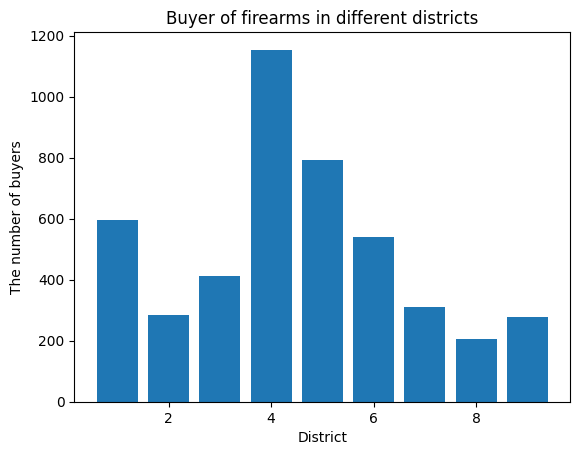

In [ ]:
# Zipcode dictionary based on the district map and zipcode map in the "reference"
zipcode_dict = {}
zipcode_dict[1] = [2113.0, 2129.0, 2128.0, 2151.0]
zipcode_dict[2] = [2203.0, 2109.0, 2110.0, 2111.0, 2210.0, 2127.0]
zipcode_dict[3] = [2125.0, 2122.0]
zipcode_dict[4] = [2121.0, 2124.0, 2126.0, 2131.0, 2130.0]
zipcode_dict[5] = [2136.0, 2126.0, 2131.0]
zipcode_dict[6] = [2130.0, 2467.0, 2132.0]
zipcode_dict[7] = [2118.0, 2119.0, 2120.0]
zipcode_dict[8] = [2215.0, 2199.0, 2116.0, 2114.0, 2108.0]
zipcode_dict[9] = [2467.0, 2135.0, 2134.0, 2163.0]

buyer_count = [transactions['BUYER ZIP'].isin(zipcode_dict[x]).sum() for x in zipcode_dict]
plt.bar(range(1,10), buyer_count)
plt.title("Buyer of firearms in different districts")
plt.xlabel('District')
plt.ylabel('The number of buyers')
plt.show()


Based on the plot, we found the buyer of guns is highest in District 4 compared to other districts, which can be one of the drivers of violence in District 4.